In [1]:
from __init__ import *

In [2]:
args = Namespace()
args.exp_name = 'exp3'

# specify which experimental setup we want to plot
args.num_imgs = 100
args.prompt_dataset = 'coco'

# for exp1, we merge results over wmch_16 for Flux and wmch_4 for SD
args.dataset_identifier = [f'num_{args.num_imgs}_fpr_0.01_cfg_3.0_wmch_16_infsteps_4',
                           f'num_{args.num_imgs}_fpr_0.01_cfg_3.0_wmch_16_infsteps_6',
                           f'num_{args.num_imgs}_fpr_0.01_cfg_3.0_wmch_16_infsteps_8',
                           f'num_{args.num_imgs}_fpr_0.01_cfg_3.0_wmch_16_infsteps_10',
                           f'num_{args.num_imgs}_fpr_0.01_cfg_3.0_wmch_16_infsteps_12', 
                           	] 

# create the output directories and filenames
args.input_dir = os.path.join('experiments', args.exp_name)
args.output_dir = os.path.join('experiments', args.exp_name, '_results', args.prompt_dataset,  args.dataset_identifier[0])
if not os.path.exists(args.output_dir):
    os.makedirs(args.output_dir)
args.merged_result_csv = os.path.join(args.output_dir, 'exp3_merged.csv')

# merged results already created in 5_merge_results.py
df = pd.read_csv(args.merged_result_csv)

# Calculate Mean over attack strengths (TABLE)

In [ ]:
model_ids = df['model_id'].unique()
wm_methods = df['wm_method'].unique()
attack_types = df['attack_type'].unique()
attack_names = df['attack_name'].unique()
tifs = sorted(df['test_inf_steps'].unique())
attack_strengths = df['attack_strength'].unique()

print(f"model_ids: {model_ids}")
print(f"wm_methods: {wm_methods}")
print(f"attack_types: {attack_types}")
print(f"attack_names: {attack_names}")
print(f"tifs: {tifs}")
print(f"attack_strengths: {attack_strengths}")

# loop over model_ids
for model_id in model_ids:
    model_df = df[df['model_id'] == model_id]
    # check if empty
    if model_df.empty:
        print(f"Model ID {model_id} has no data.")
        continue
    else:
        print(f"\nModel: {model_id}")
    
    # loop over wm_methods
    for wm_method in wm_methods:
        wm_df = model_df[model_df['wm_method'] == wm_method]
        # check if empty
        if wm_df.empty:
            print(f"\tWM method {wm_method} has no data for model ID {model_id}.")
            continue
        else:
            print(f"\tWM method: {wm_method}")
        for attack_name in attack_names:
            attack_df = wm_df[model_df['attack_name'] == attack_name]
            # check if empty
            if attack_df.empty:
                print(f"\t\tAttack name {attack_name} has no data for model ID {model_id} and WM method {wm_method}.")
                continue
            else:
                print(f"\t\tAttack name: {attack_name}")
            for tif in tifs:
                tif_df = attack_df[attack_df['test_inf_steps'] == tif]
                # check if empty
                if tif_df.empty:
                    print(f"\n\t\t\tTest inf steps {tif} has no data for attack name {attack_name}, model ID {model_id}, and WM method {wm_method}.")
                    continue
                else:
                    print(f"\n\t\t\tTest inf steps: {tif}")
                
                attack_strengths = tif_df['attack_strength'].unique()
                #print(f"\t\t\t\tattack strengths: {attack_strengths}")
                #print(f"\t\t\t\ttpr empirical values: {wm_ch_df['tpr_empirical'].values}")
                #print(wm_ch_df)
                mean_tpr = tif_df['tpr_empirical'].mean()
                std_tpr = tif_df['tpr_empirical'].std()
                print(f"\t\t\t\tMean TPR: {mean_tpr:.3f}+-{std_tpr:.3f}")
            

# Plot the Comparison

compare_variable: test_inf_steps
compare_variables: [ 4.  6.  8. 10. 12.]


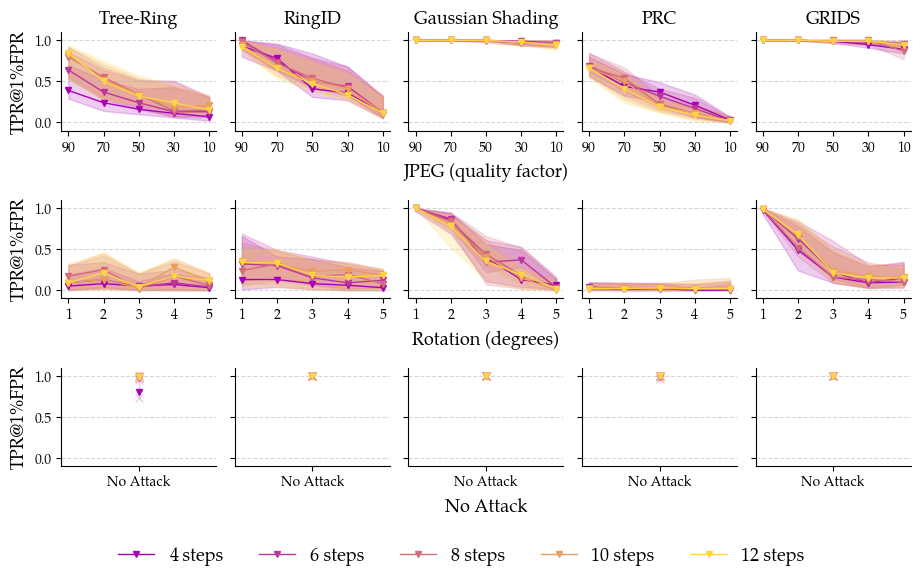

Plot saved to experiments/exp3/_results/coco/num_100_fpr_0.01_cfg_3.0_wmch_16_infsteps_4/exp3_plot_flux_s_tpr_empirical.pdf


In [3]:
# plot the results for only the flux_s model
args.title = (
    f'Exp3: Effect of "test inference steps" on Perfomance\n' \
    f'for dataset "{args.prompt_dataset}" and model "Flux-[schnell]"\n' \
)
args.output_plot = os.path.join(args.output_dir,  'exp3_plot_flux_s_tpr_empirical.pdf')
results_df = df[df['model_id'] == 'flux_s']
plot_tpr_per_attack_compare_variable(args, results_df, 'tpr_empirical', 'test_inf_steps', TIF_NAME_MAPPING)

# args.output_plot = os.path.join(args.output_dir,  'exp3_plot_flux_s_wm_diff.pdf')
# plot_tpr_per_attack_compare_variable(args, results_df, 'wm_diff', 'test_inf_steps', TIF_NAME_MAPPING)

# args.output_plot = os.path.join(args.output_dir,  'exp3_plot_flux_s_tpr_empirical_mean.pdf')    
# plot_tpr_per_attack_compare_variable(args, results_df, 'tpr_empirical_mean', 'test_inf_steps', TIF_NAME_MAPPING)

# args.output_plot = os.path.join(args.output_dir,  'exp3_plot_flux_s_tpr_acc.pdf')
# plot_tpr_per_attack_compare_variable(args, results_df, 'acc', 'test_inf_steps', TIF_NAME_MAPPING)